# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


In [1]:
!pip install fuzzywuzzy

# 1- import packages and load data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [6]:
df=pd.read_excel('candyhierarchy2017.xlsx')

C:\Users\alyah\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [7]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [8]:
df.shape

(2460, 120)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [10]:
pd.set_option("display.max_columns",120)

In [11]:
df.dtypes.to_frame().T

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object


In [12]:
df.describe(include=["O"]).loc["unique"].to_frame()

,unique
Q1: GOING OUT?,2
Q2: GENDER,4
Q3: AGE,106
Q4: COUNTRY,128
"Q5: STATE, PROVINCE, COUNTY, ETC",511
...,...
Q9: OTHER COMMENTS,385
Q10: DRESS,2
Unnamed: 113,1
Q11: DAY,2


In [13]:
df.describe(include=["O"]).loc["unique"].max()

952

In [14]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

<!--  -->

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [15]:
df.replace({'N/A',"NA","nan","NAN"},np.NaN ,inplace=True)

In [16]:
df.columns = df.columns.map(lambda x : x.replace("|",":"))
df.columns = df.columns.map(lambda x: x.replace(" :", ":"))

In [17]:
Q_indexs = [f"Q{i}" for i in range(1,13)]
Q={}
Q_indexs

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']

In [18]:
for i , index in enumerate(Q_indexs):
    Q[i+1] =[col for col in df.columns if col.strip().startswith(index +":")]

In [19]:
df.drop(columns=['Internal ID'] , inplace=True )

In [20]:
df.isnull().sum().to_frame().T

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,110,41,84,64,100,747,734,672,958,992,1006,765,688,706,682,683,678,691,752,680,743,946,711,853,704,692,729,702,823,731,697,879,734,716,697,695,694,712,673,672,678,713,694,695,1026,698,942,744,945,674,736,730,686,685,718,691,725,1024,729,693,688,675,671,727,729,764,813,942,724,776,811,740,744,723,698,817,710,709,722,753,679,691,1014,714,776,706,725,901,690,738,882,693,708,715,1002,917,714,736,708,706,708,690,792,789,823,757,747,705,1549,1743,2074,744,2451,725,2375,1098,2361,2393,855


In [21]:
df

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
df.drop(columns=['Unnamed: 113' ,'Click Coordinates (x, y)' ] , inplace=True )

In [23]:

for i in range(7,10):
    df.drop(Q[i][0],axis=1,inplace=True)


In [24]:
df.drop(columns = Q[12] , inplace=True)

In [22]:
df

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [25]:
df[Q[1][0]].unique()
df[Q[1][0]].value_counts()

Q1: GOING OUT?
No     2038
Yes     312
Name: count, dtype: int64

<Axes: xlabel='Q1: GOING OUT?'>

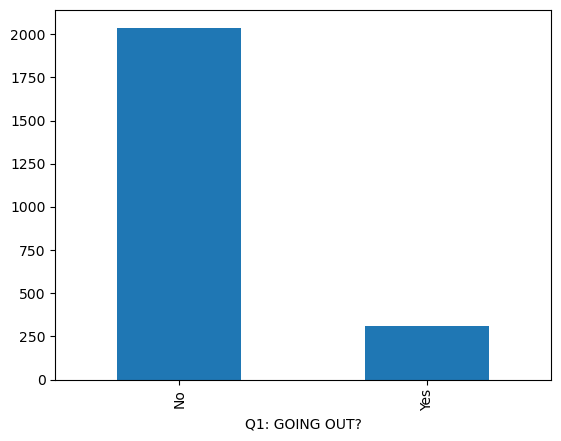

In [26]:
df[Q[1][0]].value_counts().plot.bar()

In [27]:
df[Q[1][0]].isnull().sum()

110

In [28]:
df[Q[1][0]]=df[Q[1][0]].fillna(df[Q[1][0]].mode()[0])

In [29]:
df[Q[1][0]].value_counts()

Q1: GOING OUT?
No     2148
Yes     312
Name: count, dtype: int64

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [30]:
df

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q10: DRESS,Q11: DAY
0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,No,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: xlabel='Q2: GENDER'>

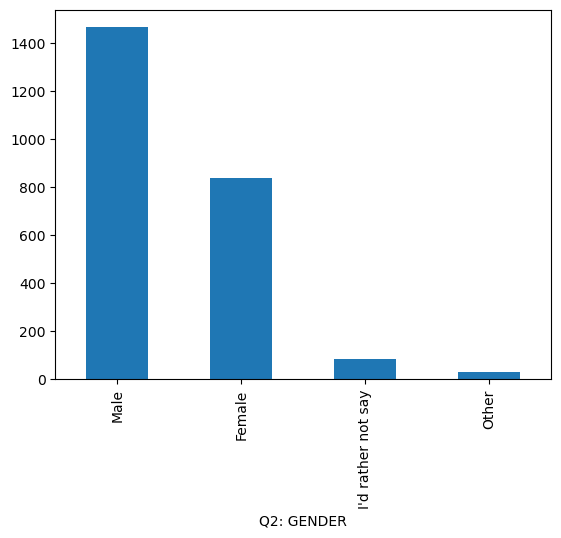

In [29]:
df[Q[2][0]].value_counts().plot.bar()

In [31]:
df[Q[2][0]].isnull().sum()

41

In [32]:
df[Q[2][0]].isnull().sum()/ df.shape[0]

0.016666666666666666

In [33]:
df.dropna(subset=Q[2][0],inplace=True)

In [35]:
assert df[Q[2][0]].isnull().sum()  ==0 
df[Q[2][0]].value_counts()

Q2: GENDER
Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: count, dtype: int64

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [36]:
df[Q[3][0]].unique()

array([44, 49, 40, 23, nan, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [37]:
df[Q[3][0]]= pd.to_numeric(df[Q[3][0]],errors='coerce')
df[Q[3][0]]

1       44.0
2       49.0
3       40.0
4       23.0
5        NaN
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Q3: AGE, Length: 2419, dtype: float64

In [38]:
df[Q[3][0]].isnull().sum()

74

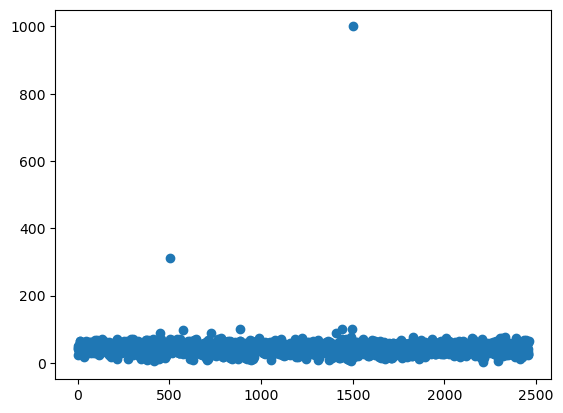

In [39]:
plt.scatter(df[Q[3][0]].index, df[Q[3][0]].values)

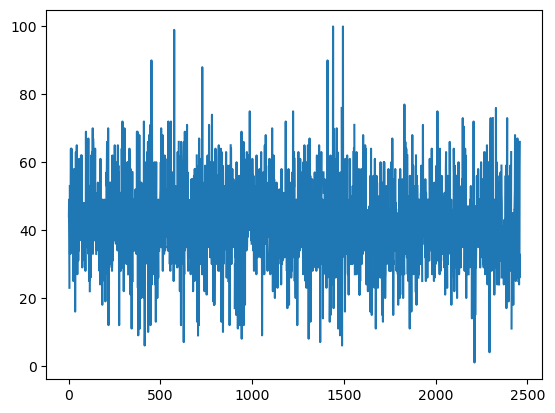

In [40]:
df[Q[3][0]] =df[Q[3][0]].apply(lambda s : np.nan if(s > 100) else s)
plt.plot(df[Q[3][0]])

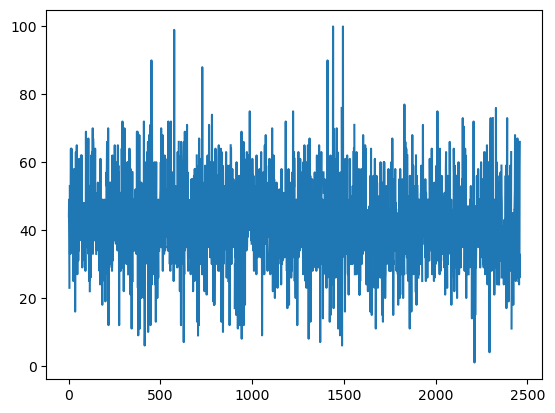

In [41]:
plt.plot(df[Q[3][0]])

In [42]:
df[Q[3][0]].index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2449, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459],
      dtype='int64', length=2419)

In [43]:
df.dropna(subset=Q[3][0],inplace=True)

In [44]:
assert df[Q[3][0]].isnull().sum() == 0

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [45]:
df[Q[4][0]].unique()

array(['USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', nan, 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 'cascadia', 'Australia', 'Greece',
       'USA? Hard to tell anymore..', "'merica", 'usas', 'Pittsburgh',
       'United State', 'France', 'australia', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'California',
       'Japan', 'USa', 'South afr

In [46]:
df[Q[3][0]].values

array([44., 49., 40., ..., 26., 58., 66.])

In [47]:
matches = process.extract('united states',df[Q[4][0]],limit= df.shape[0])
matches

[('United States', 100, 18),
 ('United States', 100, 19),
 ('United States', 100, 22),
 ('United States', 100, 23),
 ('United States', 100, 24),
 ('united states', 100, 26),
 ('United States', 100, 28),
 ('United States', 100, 30),
 ('United States ', 100, 35),
 ('United States', 100, 37),
 ('United States', 100, 39),
 ('United States', 100, 40),
 ('United States', 100, 49),
 ('United States', 100, 51),
 ('United States', 100, 52),
 ('United States', 100, 54),
 ('United States', 100, 55),
 ('United States ', 100, 73),
 ('United States', 100, 75),
 ('United States', 100, 76),
 ('United States', 100, 80),
 ('United States', 100, 85),
 ('United States', 100, 87),
 ('United States', 100, 88),
 ('United States', 100, 91),
 ('United States', 100, 95),
 ('United States', 100, 101),
 ('United States', 100, 109),
 ('United States', 100, 115),
 ('United states', 100, 123),
 ('United States', 100, 124),
 ('United States ', 100, 125),
 ('United states', 100, 130),
 ('United States', 100, 132),
 ('

In [48]:
len(matches)

2342

In [49]:
for match in matches:
  if match[1] >60:
    df.loc[match[2],[Q[4][0]]] = "USA"

In [50]:
print(df[Q[4][0]].unique())

['USA ' 'USA' 'us' 'usa' 'canada' 'Canada' 'Us' nan 'US' 'Murica' 'uk'
 'United Kingdom' 'Usa' 'UAE' 'England' 'UK' 'canada ' 'Mexico' 'u.s.a.'
 'USAUSAUSA' 'america' 'france' 'U.S.A.' 'finland' 'Canada ' 'US of A'
 'North Carolina ' 'Netherlands' 'germany' 'Europe' 'Earth' 'U.K. '
 'Costa Rica' 'cascadia' 'Australia' 'Greece'
 'USA? Hard to tell anymore..' "'merica" 'usas' 'Pittsburgh' 'France'
 'australia' 'Can' 'Canae' 'New York' 'Trumpistan' 'Ireland' 'Korea'
 'California' 'Japan' 'USa' 'South africa' 'Usa ' 'Uk' 'Iceland' 'Germany'
 'Canada`' 'Scotland' 'UK ' 'Denmark' 'France ' 'Switzerland' 'UD'
 'Scotland ' 'South Korea' 'New Jersey' 'CANADA' 'Indonesia' 'America'
 'The Netherlands' 'endland' 'murrika' 'USA! USA! USA!' 'USAA'
 'soviet canuckistan' 'N. America' 'Singapore' 'USSA' 'China' 'Taiwan'
 'Ireland ' 'hong kong' 'spain' 'Sweden' 'Hong Kong' 'Narnia' 'u s a' 1
 'United kingdom' 'USA USA USA!!!!' "I don't know anymore"]


In [51]:
!pip install fuzzywuzzy

In [52]:
matches = process.extract('canada',df[Q[4][0]],limit= df.shape[0])
matches

[('canada', 100, 7),
 ('Canada', 100, 8),
 ('Canada', 100, 11),
 ('Canada', 100, 14),
 ('Canada', 100, 21),
 ('Canada', 100, 58),
 ('Canada', 100, 61),
 ('Canada', 100, 72),
 ('Canada', 100, 77),
 ('Canada', 100, 89),
 ('canada', 100, 92),
 ('Canada', 100, 103),
 ('canada ', 100, 110),
 ('Canada', 100, 118),
 ('Canada', 100, 138),
 ('Canada', 100, 169),
 ('canada', 100, 185),
 ('Canada', 100, 226),
 ('Canada', 100, 228),
 ('canada', 100, 237),
 ('Canada', 100, 244),
 ('Canada ', 100, 262),
 ('Canada', 100, 276),
 ('Canada', 100, 285),
 ('Canada', 100, 306),
 ('canada', 100, 312),
 ('Canada', 100, 314),
 ('Canada', 100, 319),
 ('Canada', 100, 342),
 ('canada', 100, 351),
 ('Canada', 100, 373),
 ('Canada', 100, 374),
 ('Canada', 100, 400),
 ('Canada', 100, 408),
 ('Canada', 100, 415),
 ('Canada', 100, 429),
 ('Canada', 100, 430),
 ('Canada', 100, 447),
 ('canada', 100, 473),
 ('Canada', 100, 480),
 ('Canada', 100, 525),
 ('canada', 100, 538),
 ('canada', 100, 552),
 ('Canada', 100, 565),

In [51]:
for match in matches:
  if match[1] >70:
    df.loc[match[2],[Q[4][0]]] = "Canada"

In [53]:
df[Q[4][0]].unique()

array(['USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', nan, 'US',
       'Murica', 'uk', 'United Kingdom', 'Usa', 'UAE', 'England', 'UK',
       'canada ', 'Mexico', 'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'U.S.A.', 'finland', 'Canada ', 'US of A', 'North Carolina ',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U.K. ', 'Costa Rica',
       'cascadia', 'Australia', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 'France', 'australia', 'Can',
       'Canae', 'New York', 'Trumpistan', 'Ireland', 'Korea',
       'California', 'Japan', 'USa', 'South africa', 'Usa ', 'Uk',
       'Iceland', 'Germany', 'Canada`', 'Scotland', 'UK ', 'Denmark',
       'France ', 'Switzerland', 'UD', 'Scotland ', 'South Korea',
       'New Jersey', 'CANADA', 'Indonesia', 'America', 'The Netherlands',
       'endland', 'murrika', 'USA! USA! USA!', 'USAA',
       'soviet canuckistan', 'N. America', 'Singapore', 'USSA', 'China',
       'Taiwan', 'Ireland ', 

In [54]:
matches = process.extract('Usa',df[Q[4][0]],limit= df.shape[0])
matches

[('USA ', 100, 1),
 ('USA', 100, 2),
 ('usa', 100, 4),
 ('usa', 100, 6),
 ('USA', 100, 15),
 ('USA', 100, 16),
 ('USA', 100, 18),
 ('USA', 100, 19),
 ('USA', 100, 22),
 ('USA', 100, 23),
 ('USA', 100, 24),
 ('USA', 100, 26),
 ('USA', 100, 27),
 ('USA', 100, 28),
 ('USA', 100, 29),
 ('USA', 100, 30),
 ('USA', 100, 31),
 ('USA', 100, 32),
 ('Usa', 100, 33),
 ('USA', 100, 34),
 ('USA', 100, 35),
 ('USA', 100, 37),
 ('Usa', 100, 38),
 ('USA', 100, 39),
 ('USA', 100, 40),
 ('USA', 100, 41),
 ('usa', 100, 45),
 ('USA', 100, 46),
 ('USA', 100, 47),
 ('Usa', 100, 48),
 ('USA', 100, 49),
 ('USA', 100, 50),
 ('USA', 100, 51),
 ('USA', 100, 52),
 ('USA', 100, 54),
 ('USA', 100, 55),
 ('USA', 100, 56),
 ('usa', 100, 57),
 ('USA', 100, 60),
 ('USA', 100, 62),
 ('USA ', 100, 63),
 ('USA', 100, 64),
 ('USA', 100, 65),
 ('Usa', 100, 66),
 ('USA', 100, 67),
 ('USA', 100, 68),
 ('USA', 100, 69),
 ('USA', 100, 70),
 ('USA', 100, 71),
 ('USA', 100, 73),
 ('USA', 100, 74),
 ('USA', 100, 75),
 ('USA', 100, 

In [55]:
matches = process.extract('us',df[Q[4][0]],limit= df.shape[0])
matches

[('us', 100, 3),
 ('Us', 100, 9),
 ('US', 100, 12),
 ('US', 100, 17),
 ('US', 100, 44),
 ('US', 100, 53),
 ('US', 100, 99),
 ('US', 100, 102),
 ('us', 100, 105),
 ('US', 100, 106),
 ('US', 100, 120),
 ('us', 100, 129),
 ('US', 100, 143),
 ('US', 100, 154),
 ('US', 100, 166),
 ('US', 100, 175),
 ('US', 100, 230),
 ('US', 100, 233),
 ('Us', 100, 236),
 ('US', 100, 278),
 ('US', 100, 279),
 ('US', 100, 293),
 ('US', 100, 298),
 ('US', 100, 303),
 ('us', 100, 304),
 ('US', 100, 307),
 ('US', 100, 308),
 ('US', 100, 328),
 ('US', 100, 329),
 ('us', 100, 355),
 ('us', 100, 387),
 ('US', 100, 390),
 ('US', 100, 404),
 ('US', 100, 432),
 ('US', 100, 434),
 ('Us', 100, 443),
 ('us', 100, 446),
 ('US', 100, 448),
 ('US', 100, 482),
 ('US', 100, 488),
 ('us', 100, 499),
 ('us', 100, 502),
 ('US', 100, 522),
 ('US', 100, 543),
 ('US', 100, 549),
 ('US', 100, 556),
 ('US', 100, 575),
 ('us', 100, 588),
 ('us', 100, 590),
 ('US', 100, 615),
 ('US', 100, 628),
 ('US', 100, 634),
 ('Us', 100, 648),
 (

In [57]:
for match in matches:
  if match[1] >= 90:
    df.loc[match[2],[Q[4][0]]] = "USA"

In [58]:
df[Q[4][0]].unique()

array(['USA', 'canada', 'Canada', nan, 'Murica', 'uk', 'United Kingdom',
       'UAE', 'England', 'UK', 'canada ', 'Mexico', 'u.s.a.', 'america',
       'france', 'U.S.A.', 'finland', 'Canada ', 'North Carolina ',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U.K. ', 'Costa Rica',
       'cascadia', 'Greece', 'USA? Hard to tell anymore..', "'merica",
       'Pittsburgh', 'France', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'Korea', 'California', 'Japan', 'South africa', 'Uk',
       'Iceland', 'Germany', 'Canada`', 'Scotland', 'UK ', 'Denmark',
       'France ', 'Switzerland', 'UD', 'Scotland ', 'South Korea',
       'New Jersey', 'CANADA', 'Indonesia', 'America', 'The Netherlands',
       'endland', 'murrika', 'soviet canuckistan', 'N. America',
       'Singapore', 'China', 'Taiwan', 'Ireland ', 'hong kong', 'spain',
       'Sweden', 'Hong Kong', 'Narnia', 'u s a', 1, 'United kingdom',
       "I don't know anymore"], dtype=object)

In [57]:
matches = process.extract('uk',df[Q[4][0]],limit= df.shape[0])
matches

[('uk', 100, 20),
 ('UK', 100, 86),
 ('UK', 100, 235),
 ('UK', 100, 322),
 ('uk', 100, 345),
 ('UK', 100, 377),
 ('UK', 100, 591),
 ('UK', 100, 610),
 ('UK', 100, 752),
 ('Uk', 100, 1184),
 ('UK', 100, 1195),
 ('UK ', 100, 1216),
 ('Uk', 100, 1242),
 ('UK', 100, 1257),
 ('UK', 100, 1325),
 ('UK', 100, 1891),
 ('UK', 100, 1905),
 ('UK', 100, 2080),
 ('U.K. ', 80, 521),
 ('u.s.a.', 57, 135),
 ('U.S.A.', 57, 224),
 ('U.S.A.', 57, 392),
 ('U.S.A.', 57, 1051),
 ('U.S.A.', 57, 1069),
 ('U.S.A.', 57, 1707),
 ('u s a', 57, 2093),
 ('U.S.A.', 57, 2297),
 ('U.S.A.', 57, 2305),
 ('UD', 50, 1267),
 ('USA', 45, 1),
 ('USA', 45, 2),
 ('USA', 45, 3),
 ('USA', 45, 4),
 ('USA', 45, 6),
 ('USA', 45, 9),
 ('USA', 45, 12),
 ('Murica', 45, 13),
 ('USA', 45, 15),
 ('USA', 45, 16),
 ('USA', 45, 17),
 ('USA', 45, 18),
 ('USA', 45, 19),
 ('USA', 45, 22),
 ('USA', 45, 23),
 ('USA', 45, 24),
 ('United Kingdom', 45, 25),
 ('USA', 45, 26),
 ('USA', 45, 27),
 ('USA', 45, 28),
 ('USA', 45, 29),
 ('USA', 45, 30),
 ('

In [59]:
for match in matches:
  if match[1] >= 80:
    df.loc[match[2],[Q[4][0]]] = "Uk"

In [60]:
df[Q[4][0]].unique()

array(['Uk', 'canada', 'Canada', nan, 'Murica', 'uk', 'United Kingdom',
       'UAE', 'England', 'UK', 'canada ', 'Mexico', 'u.s.a.', 'america',
       'france', 'U.S.A.', 'finland', 'Canada ', 'North Carolina ',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U.K. ', 'Costa Rica',
       'cascadia', 'Greece', 'USA? Hard to tell anymore..', "'merica",
       'Pittsburgh', 'France', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'Korea', 'California', 'Japan', 'South africa',
       'Iceland', 'Germany', 'Canada`', 'Scotland', 'UK ', 'Denmark',
       'France ', 'Switzerland', 'UD', 'Scotland ', 'South Korea',
       'New Jersey', 'CANADA', 'Indonesia', 'America', 'The Netherlands',
       'endland', 'murrika', 'soviet canuckistan', 'N. America',
       'Singapore', 'China', 'Taiwan', 'Ireland ', 'hong kong', 'spain',
       'Sweden', 'Hong Kong', 'Narnia', 'u s a', 1, 'United kingdom',
       "I don't know anymore"], dtype=object)

In [60]:
matches = process.extract('United Kingdom',df[Q[4][0]],limit= df.shape[0])
matches

[('United Kingdom', 100, 25),
 ('United Kingdom', 100, 42),
 ('United Kingdom', 100, 43),
 ('United Kingdom', 100, 90),
 ('United Kingdom', 100, 465),
 ('United Kingdom', 100, 842),
 ('United Kingdom', 100, 872),
 ('United Kingdom', 100, 873),
 ('United Kingdom', 100, 1238),
 ('United Kingdom', 100, 1577),
 ('United Kingdom', 100, 1897),
 ('United Kingdom', 100, 2198),
 ('United kingdom', 100, 2351),
 ('Indonesia', 48, 1378),
 ('Uk', 45, 20),
 ('Uk', 45, 86),
 ('Uk', 45, 235),
 ('Uk', 45, 322),
 ('Uk', 45, 345),
 ('Uk', 45, 377),
 ('Uk', 45, 521),
 ('Uk', 45, 591),
 ('Uk', 45, 610),
 ('Uk', 45, 752),
 ('New York', 45, 954),
 ('Uk', 45, 1184),
 ('Uk', 45, 1195),
 ('Uk', 45, 1216),
 ('Uk', 45, 1242),
 ('Uk', 45, 1257),
 ('UD', 45, 1267),
 ('Uk', 45, 1325),
 ('Singapore', 45, 1734),
 ('Uk', 45, 1891),
 ('Uk', 45, 1905),
 ('Sweden', 45, 1915),
 ('Uk', 45, 2080),
 ('Sweden', 45, 2188),
 ('Murica', 43, 13),
 ('hong kong', 43, 1901),
 ('Hong Kong', 43, 1976),
 ("I don't know anymore", 41, 237

In [61]:
for match in matches:
  if match[1] == 100:
    df.loc[match[2],[Q[4][0]]] = "Uk"

<Axes: xlabel='Q4: COUNTRY'>

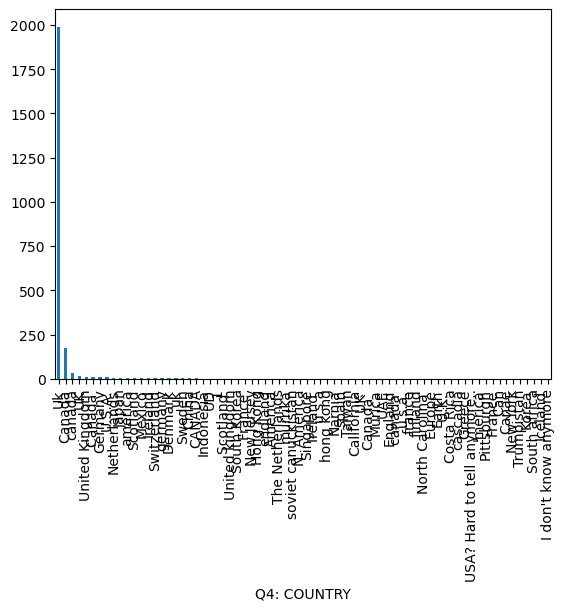

In [62]:
df[Q[4][0]].value_counts().plot.bar()

In [56]:
# other by manual method 

# example : 

df[Q[4][0]].replace(['u.s.a.','u s a'],"USA",inplace=True)


In [57]:
df[Q[4][0]].unique()

array(['Uk', 'canada', 'Canada', nan, 'Murica', 'uk', 'United Kingdom',
       'UAE', 'England', 'UK', 'canada ', 'Mexico', 'USA', 'america',
       'france', 'U.S.A.', 'finland', 'Canada ', 'US of A',
       'North Carolina ', 'Netherlands', 'germany', 'Europe', 'Earth',
       'U.K. ', 'Costa Rica', 'cascadia', 'Australia', 'Greece',
       'USA? Hard to tell anymore..', "'merica", 'Pittsburgh', 'France',
       'australia', 'Can', 'Canae', 'New York', 'Trumpistan', 'Ireland',
       'Korea', 'California', 'Japan', 'South africa', 'Iceland',
       'Germany', 'Canada`', 'Scotland', 'UK ', 'Denmark', 'France ',
       'Switzerland', 'UD', 'Scotland ', 'South Korea', 'New Jersey',
       'CANADA', 'Indonesia', 'America', 'The Netherlands', 'endland',
       'murrika', 'soviet canuckistan', 'N. America', 'Singapore',
       'China', 'Taiwan', 'Ireland ', 'hong kong', 'spain', 'Sweden',
       'Hong Kong', 'Narnia', 1, 'United kingdom', "I don't know anymore"],
      dtype=object)

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [58]:
df[Q[5][0]].nunique()

499

In [59]:
df[Q[5][0]]= df[Q[5][0]].str.lower()

In [60]:
df[Q[5][0]].nunique()

368

In [61]:
df[Q[5][0]].isna().sum()

38

In [63]:
df.dropna(subset=Q[5][0],inplace=True)
df[Q[5][0]].unique()

array(['nm', 'virginia', 'or', 'exton pa', 'colorado ', 'ontario', 'wa',
       'quebec', 'ny', 'california', 'texas', 'new york', 'co', 'in',
       'mn', 'aberdeenshire', 'alberta', 'wisconsin, 53705', 'ri', 'nc',
       'scotland', 'minnesota', 'michigan', 'florida', 'new jersey', 'va',
       'colorado', 'los angeles, california', 'ca', 'new york ',
       'chicago, illinois', 'nj', 'wisconsin', 'minnesota ', 'london',
       'illinois', 'district of columbia', 'washington', 'massachusetts ',
       'montana', 'massachusetts', 'abu dhabi', 'tx', 'arizona', 'dc',
       'yukon', 'pennsylvania ', 'md', 'ohio', 'alberta ', 'oxfordshire',
       'iowa', 'tn', 'bc', 'maryland', 'mi', 'wisconsin ', 'alaska',
       'colorado, jefferson county ', 'louisiana', 'pa',
       'co, larimer county', 'nebraska ', 'oregon', 'ut', 'pennsylvania',
       'cdmx', 'north carolina', 'tennessee ', 'texas ',
       'knox county, tennessee', 'new mexico', 'maine',
       'virginia, arlington', 'mo', 'ill

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [70]:
df

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q10: DRESS,Q11: DAY
1,No,Male,44.0,USA,nm,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,No,Male,49.0,USA,virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40.0,USA,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR

In [71]:
df[Q[6]].apply(lambda x: pd.Series(round( x.isnull().sum() / df.shape[0] *100 ,2 ) ) )

,Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties
0,28.78,28.26,25.78,37.54,38.85,39.5,29.51,26.39,27.17,26.26,26.22,26.04,26.48,28.99,26.09,28.6,36.85,27.43,33.29,27.08,26.56,27.99,26.91,31.94,28.17,26.82,34.29,28.3,27.6,26.74,26.65,26.65,27.34,25.87,25.82,26.09,27.43,26.69,26.78,40.15,26.78,36.94,28.69,36.81,25.91,28.26,28.08,26.26,26.26,27.6,26.52,27.95,40.1,28.04,26.69,26.48,25.91,25.78,27.95,28.04,29.47,31.51,36.72,27.82,30.03,31.42,28.43,28.73,27.73,26.65,31.29,27.3,27.17,27.73,29.04,26.13,26.61,39.8,27.43,29.95,27.17,27.73,35.24,26.52,28.39,34.33,26.61,27.17,27.43,39.28,35.68,27.47,28.43,27.21,27.08,27.04,26.48,30.6,30.6,31.94,29.25,28.78,27.17


In [72]:
df[Q[6]].apply(lambda x : x.mode()).T.mode()

,0
0,JOY


In [73]:
for col in Q[6]:
    print(df[col].value_counts())

Q6: 100 Grand Bar
JOY        841
MEH        720
DESPAIR     80
Name: count, dtype: int64
Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)
DESPAIR    1038
MEH         447
JOY         168
Name: count, dtype: int64
Q6: Any full-sized candy bar
JOY        1493
MEH         202
DESPAIR      15
Name: count, dtype: int64
Q6: Black Jacks
DESPAIR    758
MEH        597
JOY         84
Name: count, dtype: int64
Q6: Bonkers (the candy)
MEH        828
DESPAIR    470
JOY        111
Name: count, dtype: int64
Q6: Bonkers (the board game)
MEH        689
DESPAIR    518
JOY        187
Name: count, dtype: int64
Q6: Bottle Caps
MEH        639
DESPAIR    537
JOY        448
Name: count, dtype: int64
Q6: Box'o'Raisins
DESPAIR    1139
MEH         454
JOY         103
Name: count, dtype: int64
Q6: Broken glow stick
DESPAIR    1555
MEH         101
JOY          22
Name: count, dtype: int64
Q6: Butterfinger
JOY        1129
MEH         437
DESPAIR     133
Name: count, dtype: int64


In [74]:
for col in Q[6]:
    print(df[col].mode()[0])

JOY
DESPAIR
JOY
DESPAIR
MEH
MEH
MEH
DESPAIR
DESPAIR
JOY
JOY
DESPAIR
DESPAIR
JOY
JOY
JOY
DESPAIR
DESPAIR
MEH
DESPAIR
DESPAIR
DESPAIR
JOY
DESPAIR
DESPAIR
MEH
MEH
DESPAIR
DESPAIR
JOY
MEH
DESPAIR
JOY
JOY
JOY
JOY
DESPAIR
DESPAIR
JOY
DESPAIR
JOY
DESPAIR
DESPAIR
DESPAIR
JOY
MEH
MEH
MEH
DESPAIR
JOY
MEH
JOY
MEH
MEH
JOY
JOY
JOY
JOY
JOY
JOY
JOY
JOY
DESPAIR
MEH
MEH
JOY
JOY
DESPAIR
JOY
JOY
MEH
DESPAIR
DESPAIR
MEH
DESPAIR
JOY
JOY
MEH
JOY
DESPAIR
JOY
JOY
MEH
JOY
JOY
DESPAIR
JOY
JOY
JOY
DESPAIR
MEH
DESPAIR
DESPAIR
JOY
JOY
DESPAIR
JOY
DESPAIR
DESPAIR
JOY
DESPAIR
DESPAIR
JOY


In [75]:
for col in Q[6]:
    df[col].fillna( df[col].mode()[0] , inplace= True) 

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

<Axes: xlabel='Q10: DRESS'>

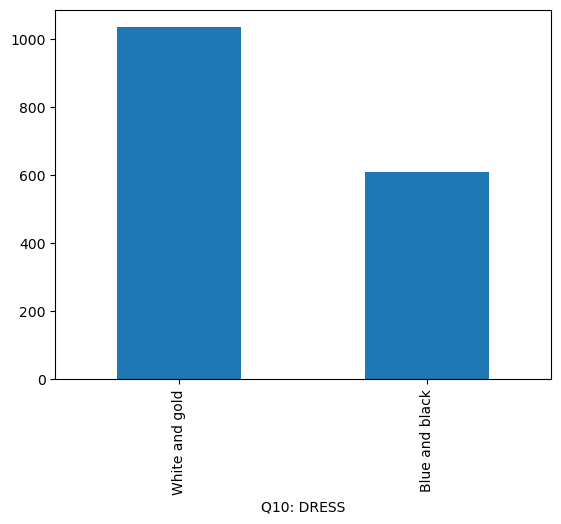

In [76]:
df[Q[10][0]].value_counts().plot.bar()

In [77]:
df[Q[10][0]].fillna( df[Q[10][0]].mode()[0] , inplace= True) 

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

<Axes: xlabel='Q11: DAY'>

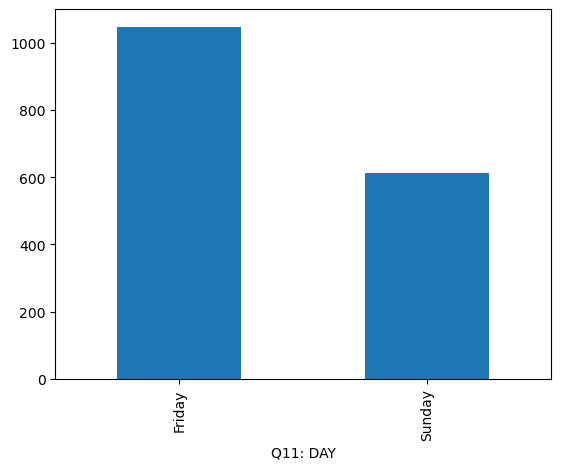

In [78]:
df[Q[11][0]].value_counts().plot.bar()

In [79]:
df[Q[11][0]].fillna( df[Q[10][0]].mode()[0] , inplace= True) 

In [80]:
assert df[Q[11][0]].isna().sum() ==0

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 

In [81]:
df.isnull().sum().to_frame().T

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6: 100 Grand Bar,Q6: Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6: Any full-sized candy bar,Q6: Black Jacks,Q6: Bonkers (the candy),Q6: Bonkers (the board game),Q6: Bottle Caps,Q6: Box'o'Raisins,Q6: Broken glow stick,Q6: Butterfinger,Q6: Cadbury Creme Eggs,Q6: Candy Corn,Q6: Candy that is clearly just the stuff given out for free at restaurants,Q6: Caramellos,"Q6: Cash, or other forms of legal tender",Q6: Chardonnay,Q6: Chick-o-Sticks (we don’t know what that is),Q6: Chiclets,Q6: Coffee Crisp,Q6: Creepy Religious comics/Chick Tracts,Q6: Dental paraphenalia,Q6: Dots,Q6: Dove Bars,Q6: Fuzzy Peaches,Q6: Generic Brand Acetaminophen,Q6: Glow sticks,Q6: Goo Goo Clusters,Q6: Good N' Plenty,Q6: Gum from baseball cards,Q6: Gummy Bears straight up,Q6: Hard Candy,Q6: Healthy Fruit,Q6: Heath Bar,Q6: Hershey's Dark Chocolate,Q6: Hershey’s Milk Chocolate,Q6: Hershey's Kisses,Q6: Hugs (actual physical hugs),Q6: Jolly Rancher (bad flavor),Q6: Jolly Ranchers (good flavor),Q6: JoyJoy (Mit Iodine!),Q6: Junior Mints,Q6: Senior Mints,Q6: Kale smoothie,Q6: Kinder Happy Hippo,Q6: Kit Kat,Q6: LaffyTaffy,Q6: LemonHeads,Q6: Licorice (not black),Q6: Licorice (yes black),Q6: Lindt Truffle,Q6: Lollipops,Q6: Mars,Q6: Maynards,Q6: Mike and Ike,Q6: Milk Duds,Q6: Milky Way,Q6: Regular M&Ms,Q6: Peanut M&M’s,Q6: Blue M&M's,Q6: Red M&M's,Q6: Green Party M&M's,Q6: Independent M&M's,Q6: Abstained from M&M'ing.,Q6: Minibags of chips,Q6: Mint Kisses,Q6: Mint Juleps,Q6: Mr. Goodbar,Q6: Necco Wafers,Q6: Nerds,Q6: Nestle Crunch,Q6: Now'n'Laters,Q6: Peeps,Q6: Pencils,Q6: Pixy Stix,Q6: Real Housewives of Orange County Season 9 Blue-Ray,Q6: Reese’s Peanut Butter Cups,Q6: Reese's Pieces,Q6: Reggie Jackson Bar,Q6: Rolos,Q6: Sandwich-sized bags filled with BooBerry Crunch,Q6: Skittles,Q6: Smarties (American),Q6: Smarties (Commonwealth),Q6: Snickers,Q6: Sourpatch Kids (i.e. abominations of nature),Q6: Spotted Dick,Q6: Starburst,Q6: Sweet Tarts,Q6: Swedish Fish,Q6: Sweetums (a friend to diabetes),Q6: Take 5,Q6: Tic Tacs,Q6: Those odd marshmallow circus peanut things,Q6: Three Musketeers,Q6: Tolberone something or other,Q6: Trail Mix,Q6: Twix,"Q6: Vials of pure high fructose corn syrup, for main-lining into your vein",Q6: Vicodin,Q6: Whatchamacallit Bars,Q6: White Bread,Q6: Whole Wheat anything,Q6: York Peppermint Patties,Q10: DRESS,Q11: DAY
0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
df.shape

(2304, 110)

In [83]:
df.to_csv("Cleaning_Data1.csv")

 <h1 align = center> © Youssef Yasser Ali</h1>